In [1]:
%matplotlib inline
# Just because installing cairon with conda is a problem
import sys
sys.path.append("/usr/local/lib/python2.7/site-packages")
import cairo

In [2]:
import igraph

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actions requiered to write the .ncol file that can be read by igraph

The [.ncol format](http://lgl.sourceforge.net/#FileFormat) requieres this format:

`vertex1name vertex2name [optionalWeight]`


In [4]:
"""
import pandas as pd
celegans_xls = pd.read_excel("CElegansNeuronTables.xls")
celegans_ncol = celegans_xls[["Origin", "Target","Number of Connections"]]
celegans_ncol.to_csv("CElegansNeuronTables.ncol",header=None,index=None,sep=" ")
"""

'\nimport pandas as pd\ncelegans_xls = pd.read_excel("CElegansNeuronTables.xls")\ncelegans_ncol = celegans_xls[["Origin", "Target","Number of Connections"]]\ncelegans_ncol.to_csv("CElegansNeuronTables.ncol",header=None,index=None,sep=" ")\n'

# Load the .ncol graph and check the edges and the nodes lists

+ `celegans.es` contains the edge list 
+ `celegans.vs` contains the vertex list 

In [5]:
celegans = igraph.Graph.Read_Ncol("CElegansNeuronTables.ncol",weights=True,directed=True)
print "Number of edges"+str(len(celegans.es()))
print "Number of vertex"+str(len(celegans.vs()))
print "Edge 0:"
print celegans.es()[0]
print "Vertex 0:"
print celegans.vs()[0]

Number of edges3363
Number of vertex299
Edge 0:
igraph.Edge(<igraph.Graph object at 0x1150a2620>, 0, {'weight': 1.0})
Vertex 0:
igraph.Vertex(<igraph.Graph object at 0x1150a2620>,0,{'name': 'ADAL'})


## Authority score

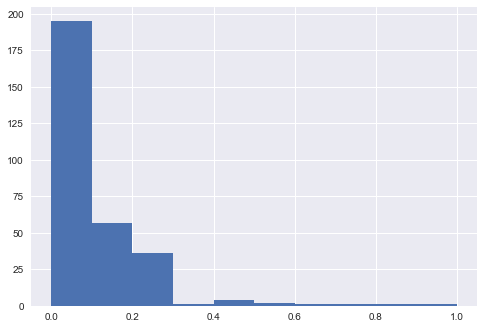

In [6]:
authority = celegans.authority_score()
_ = plt.hist(authority)

## Average path length and assortativity degree

In [7]:
print "AVG path length = "+str(celegans.average_path_length())
print "Assorativity degree = "+str(celegans.assortativity_degree())


AVG path length = 3.06344022896
Assorativity degree = -0.0662516366925


## Betweenness, closeness,  eccentricity and pagerank

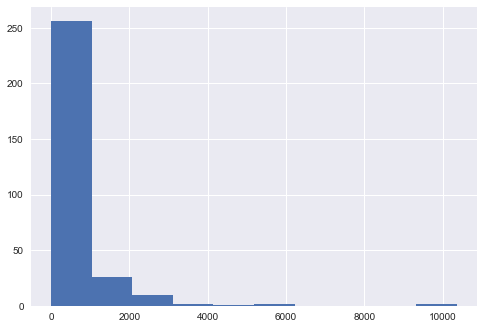

In [8]:
betweenness = celegans.betweenness()
_ = plt.hist(betweenness)

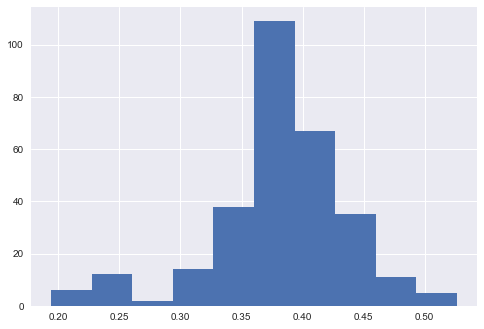

In [9]:
closeness = celegans.closeness()
_ = plt.hist(closeness)

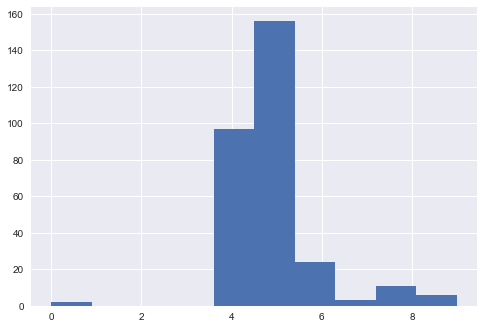

In [10]:
eccentricity = celegans.eccentricity()
_ = plt.hist(eccentricity)

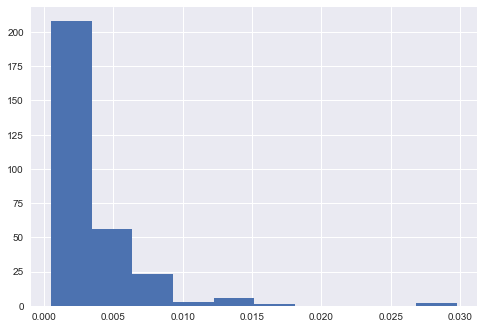

In [11]:
pagerank = celegans.pagerank()
_ = plt.hist(pagerank)

## Clustering coefficient

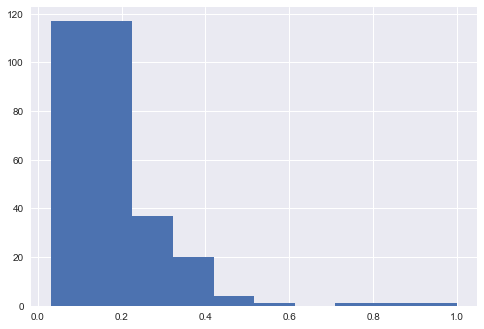

In [12]:
clustering = celegans.transitivity_local_undirected()
_ = plt.hist(clustering)

## Degree distribution

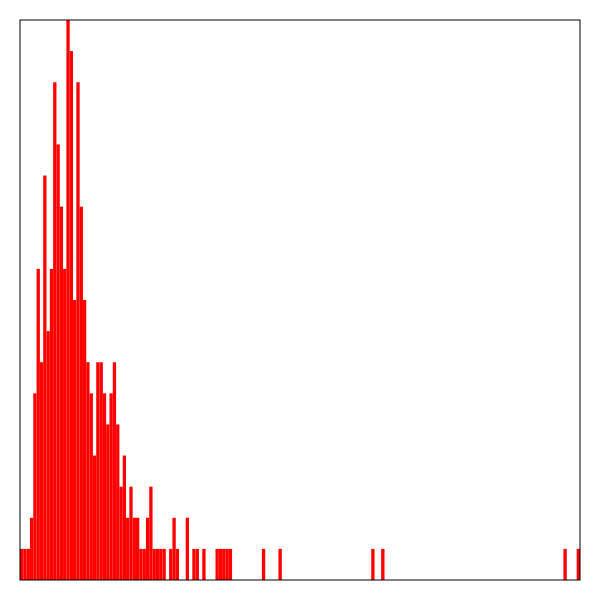

In [13]:
igraph.plot(celegans.degree_distribution())

## Comunitites analysis with Louvain algorithm ([louvain library](https://pypi.python.org/pypi/louvain/))

Find a partition and assess the quality

In [14]:
import louvain
network_partition = louvain.find_partition(celegans, method='Modularity', weight='weight')
network_partition.significance = louvain.quality(celegans, network_partition, method='Significance')
print network_partition.significance
igraph.summary(network_partition)


1256.66478428
Clustering with 299 elements and 7 clusters


# Convert the partitioning into a graph of clusters

In [15]:
network_cluster = network_partition.cluster_graph()
network_cluster.get_adjacency()
cluster_membership = network_partition.membership

# Analyse the correlation between the measures obtained for each vertex


In [16]:
import pandas as pd
df = pd.DataFrame()
df["clustering"] = clustering
df["pagerank"] = pagerank
df["eccentricity"] = eccentricity
df["closeness"] = closeness
df["betweenness"] = betweenness
df["cluster_membership"] = cluster_membership
df.index = [neuron["name"] for neuron in celegans.vs()]
df = (df-df.mean())/df.std()

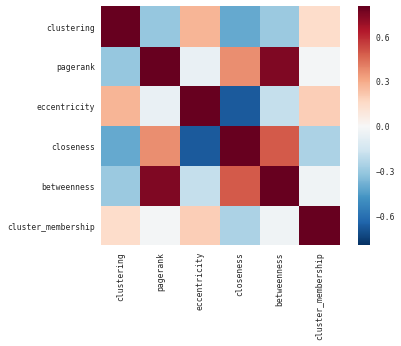

In [17]:
sns.set(context="paper", font="monospace")
# Load the datset of correlations between cortical brain networks
corrmat = df.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

## Plot the network

`igraph` works with cairo library so you will need to install it first.

If you are working with anaconda in MacOSX and you had issues with cairo trying to type:

`conda install cairo`

`conda install pycairo`

We suggest you to install cairo with brew in the brew directory:

`brew install cairo`

`brew install py2cairo`

And then add the brew directory to the sys pat in the code:

`import sys`

`sys.path.append(“/usr/local/lib/python2.7/site-packages”)`



In [18]:
#image = igraph.plot(celegans)
#image.show()

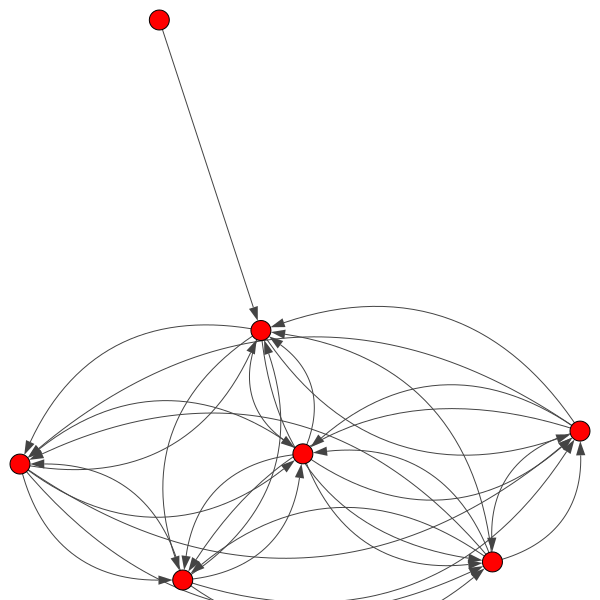

In [19]:
layout = network_cluster.layout("kk")
igraph.plot(network_cluster)